# **Exploratory Data Analysis**

## Objectives

* The primary objective of this analysis is to explore and visualise air pollution trends across regions and cities in the United States from 2000–2016. The cleaned dataset (analysis.csv) provides an opportunity to uncover insights that are both descriptive and diagnostic.

## Inputs

* Cleaned data, analysis.csv

## Outputs

- 1. Maximum Pollution by Region 
- 2. Minimum Pollution by Region
- 3. Average Pollution by Region
- 4. Top 10 Most Polluted Cities
- 5. Top 10 Cleanest Cities
- 6. Heatmap (City-Year Pollution)
- 7. Top regions Treemap
- 8. Number of Measurements per State (Top 10)
- 9. Average NO2 AQI by State (Top 5)
- 10. Highest Recorded O3 AQI
- 11. Correlation Between Pollutant Means
- 12. Average SO2 AQI by Year
- 13. Average AQI by year for NO2, 03, SO2, CO

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



In [2]:
# Change working directory current folder to parent folder

import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\air-quality-dashboard\\jupyter_notebooks'

In [3]:
#Make parent of current directory the new current directory

os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\air-quality-dashboard'

## Setup & Data Loading

In [ ]:
%pip install matplotlib seaborn plotly
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

---

In [24]:
# Load the cleaned dataset
if 'df' not in globals():
    df = pd.read_csv('analysis.csv')


In [ ]:
# Standardize column names

df.columns = df.columns.str.lower().str.strip()

In [ ]:
# Extract year & month from date column (if exists)

if 'date_local' in df.columns:
    df['date_local'] = pd.to_datetime(df['date_local'], errors='coerce')
    df['year'] = df['date_local'].dt.year
    df['month'] = df['date_local'].dt.month

In [ ]:
# Create region & city columns if missing

if 'state' in df.columns and 'county' in df.columns:
    df['region'] = df['state']
if 'city' not in df.columns and 'county' in df.columns:
    df['city'] = df['county']

In [ ]:
# Identify numeric pollution columns

pollutants = [col for col in df.columns if any(x in col for x in ['pm', 'o3', 'no2', 'so2', 'co']) and df[col].dtype in ['float64', 'int64']]
print("Pollutants detected:", pollutants)

Pollutants detected: ['state code', 'county code', 'no2 mean', 'no2 1st max value', 'no2 1st max hour', 'no2 aqi', 'o3 mean', 'o3 1st max value', 'o3 1st max hour', 'o3 aqi', 'so2 mean', 'so2 1st max value', 'so2 1st max hour', 'so2 aqi', 'co mean', 'co 1st max value', 'co 1st max hour', 'co aqi']


## Graphical Insights

#### 1. Maximum Pollution by Region

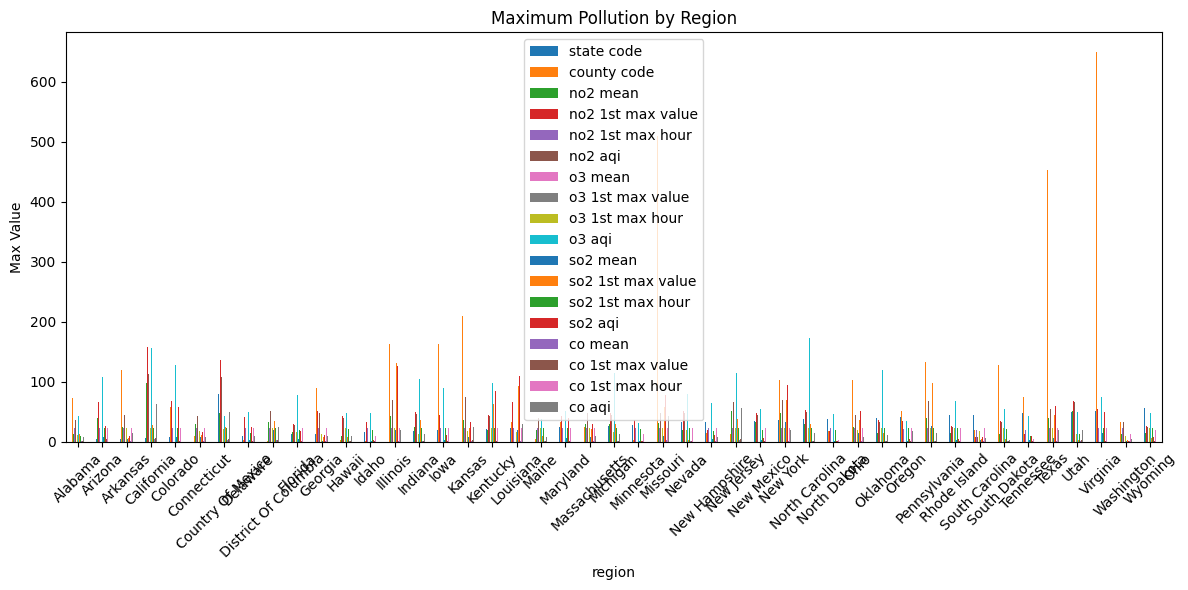

In [ ]:
df.groupby('region')[pollutants].max().plot(kind='bar', figsize=(12,6))
plt.title("Maximum Pollution by Region")
plt.ylabel("Max Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Minimum Pollution by Region

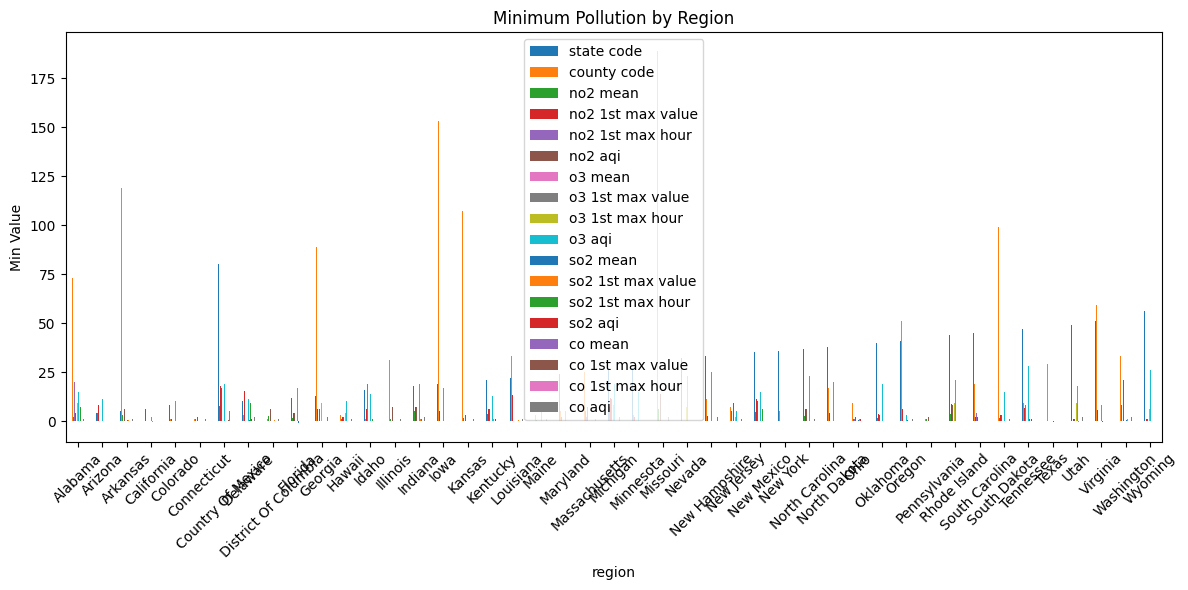

In [ ]:
df.groupby('region')[pollutants].min().plot(kind='bar', figsize=(12,6))
plt.title("Minimum Pollution by Region")
plt.ylabel("Min Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Average Pollution by Region

#### 4. Top 10 Most Polluted Cities

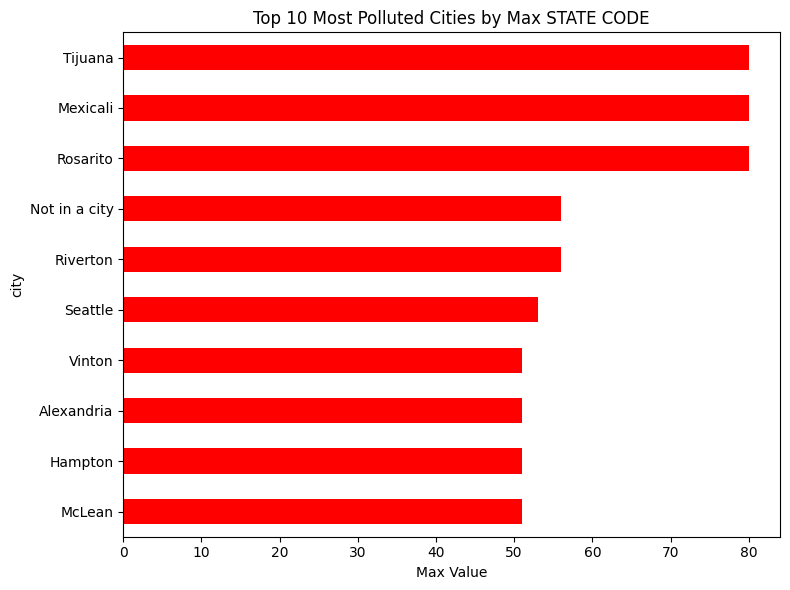

In [ ]:
top10_max = df.groupby('city')[pollutants[0]].max().sort_values(ascending=False).head(10)
top10_max.plot(kind='barh', color='red', figsize=(8,6))
plt.title(f"Top 10 Most Polluted Cities by Max {pollutants[0].upper()}")
plt.xlabel("Max Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### 5. Top 10 Cleanest Cities

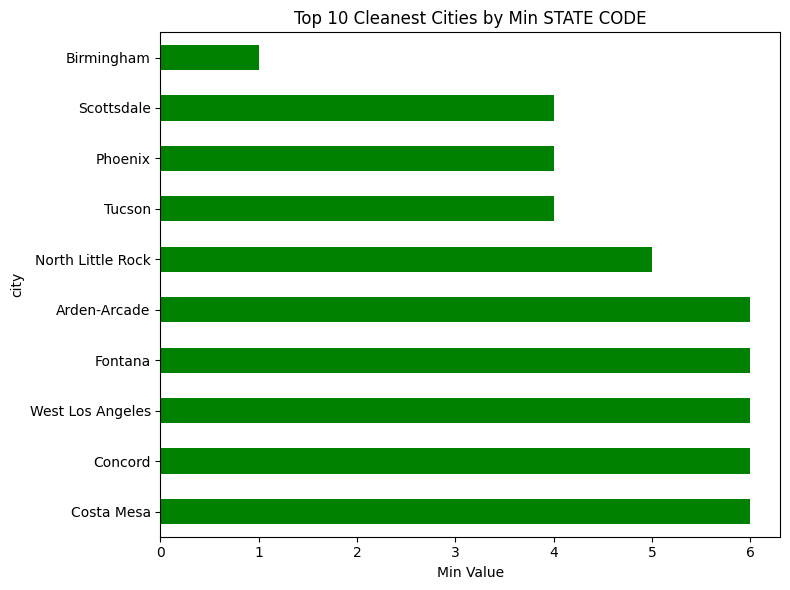

In [ ]:
top10_min = df.groupby('city')[pollutants[0]].min().sort_values(ascending=True).head(10)
top10_min.plot(kind='barh', color='green', figsize=(8,6))
plt.title(f"Top 10 Cleanest Cities by Min {pollutants[0].upper()}")
plt.xlabel("Min Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### g. Boxplot for Top 10 Cities

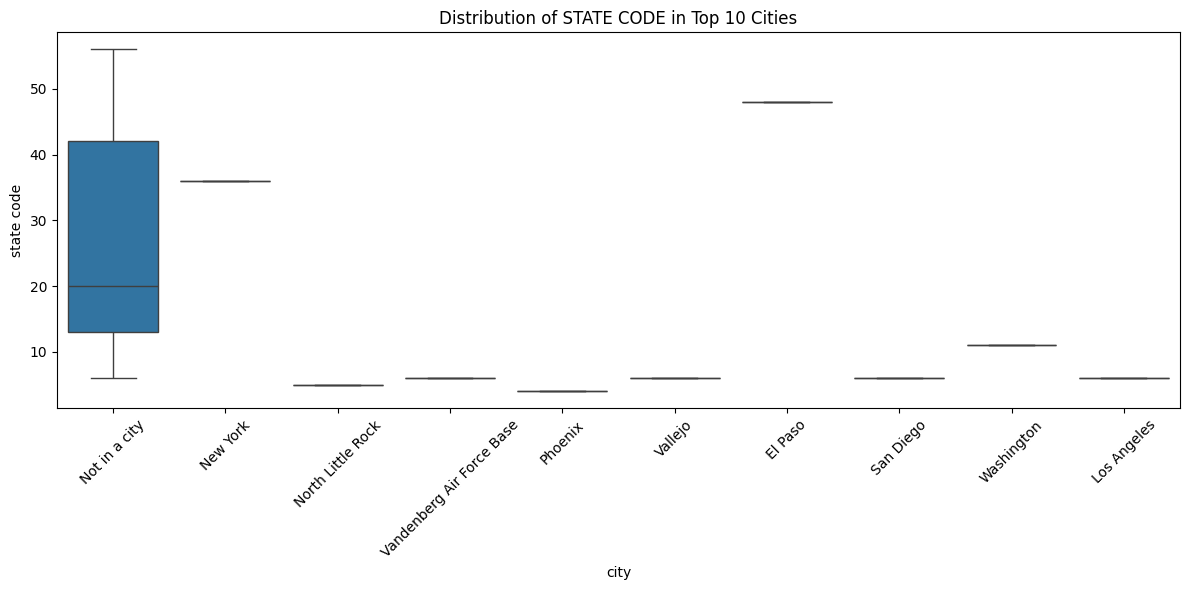

In [ ]:
top_cities = df['city'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['city'].isin(top_cities)], x='city', y=pollutants[0])
plt.title(f"Distribution of {pollutants[0].upper()} in Top 10 Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. Heatmap (City-Year Pollution)

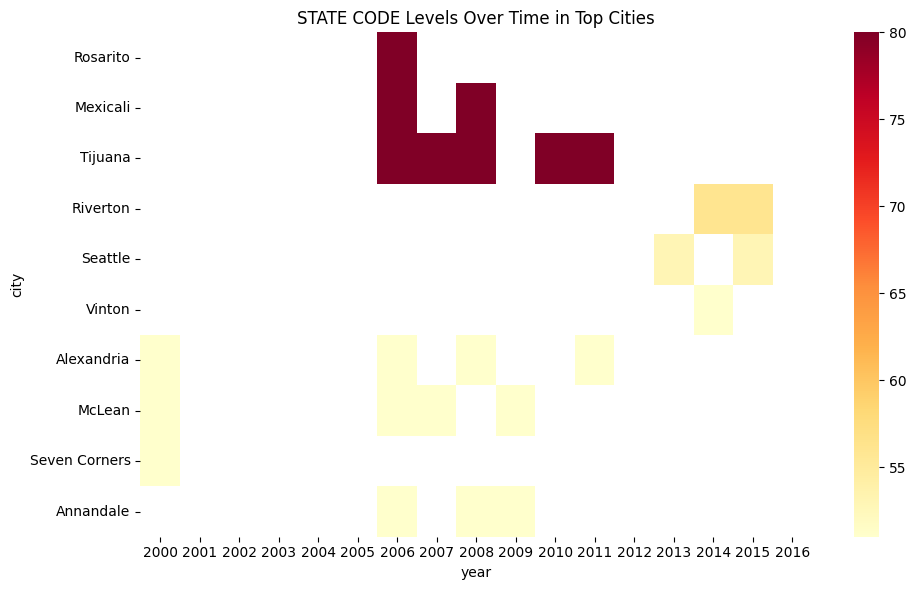

In [ ]:
# Ensure 'year' column exists
if 'year' not in df.columns and 'date local' in df.columns:
	df['year'] = pd.to_datetime(df['date local'], errors='coerce').dt.year

pivot_table = df.pivot_table(values=pollutants[0], index='city', columns='year', aggfunc='mean')
top_heatmap_cities = pivot_table.mean(axis=1).sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table.loc[top_heatmap_cities], cmap="YlOrRd")
plt.title(f"{pollutants[0].upper()} Levels Over Time in Top Cities")
plt.tight_layout()
plt.show()

#### 7. Top regions Treemap

In [ ]:
%pip install squarify
import squarify

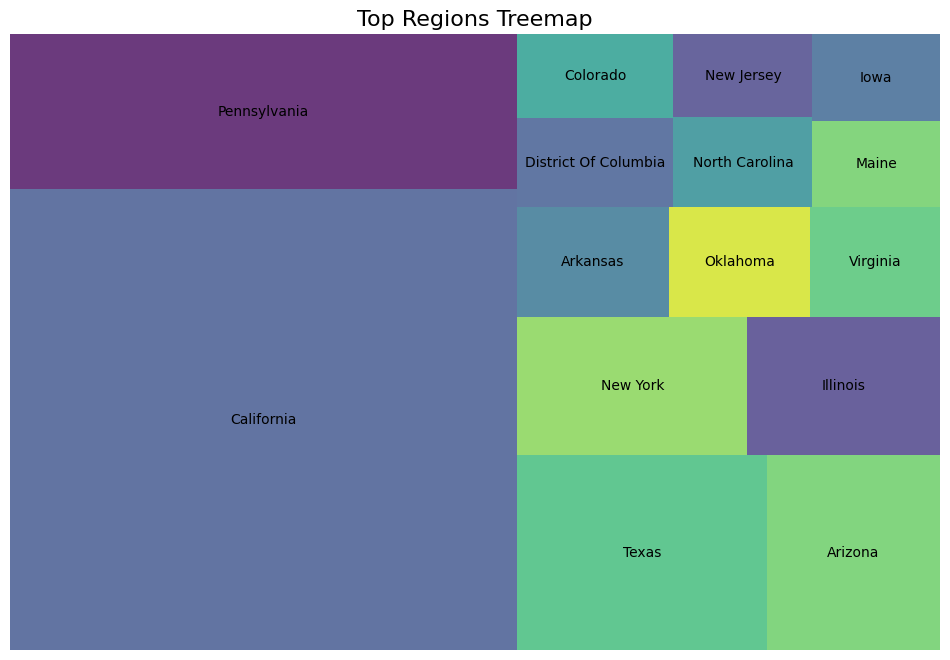

In [ ]:
region_counts = df['region'].value_counts().head(15)

plt.figure(figsize=(12, 8)) 
squarify.plot(
    sizes=region_counts.values,
    label=region_counts.index,
    alpha=.8
)
plt.axis('off')
plt.title("Top Regions Treemap", fontsize=16)  
plt.show()

#### 8. Number of Measurements per State (Top 10)

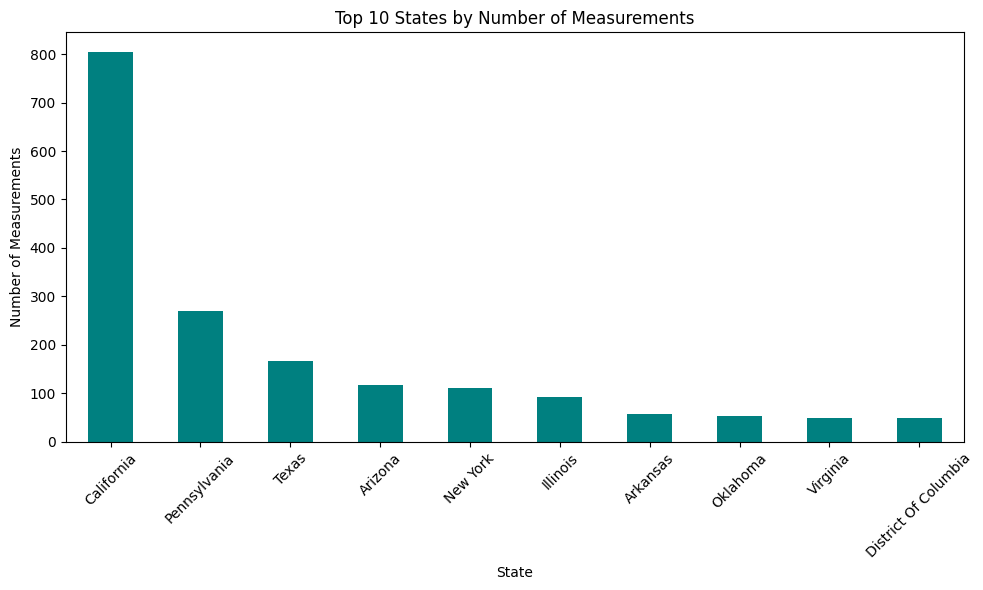

In [ ]:
# Count measurements by state
count_state = df['state'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
count_state.plot(kind='bar', color='teal')
plt.title('Top 10 States by Number of Measurements')
plt.xlabel('State')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart above shows the top 10 states by the number of air quality measurements, indicating where data collection efforts have been most concentrated.

#### 9. Average NO2 AQI by State (Top 5)

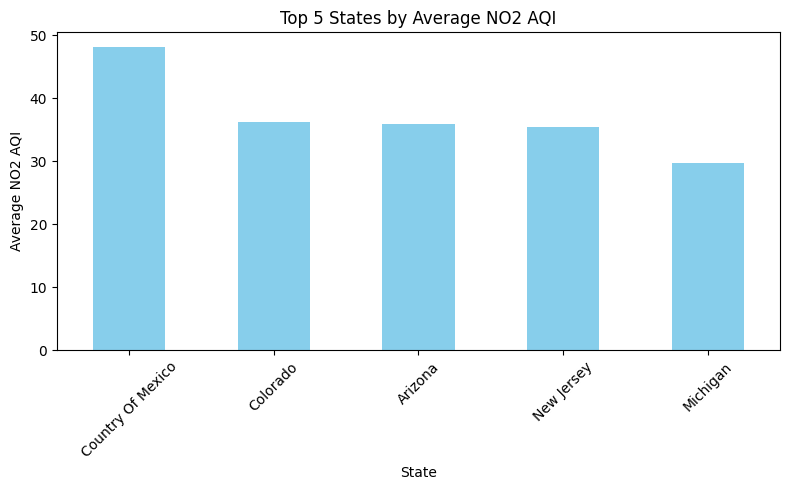

In [ ]:
# Compute average NO2 AQI by state
avg_no2 = df.groupby('state')['no2 aqi'].mean().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
avg_no2.plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Average NO2 AQI')
plt.xlabel('State')
plt.ylabel('Average NO2 AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart above displays the top 5 states with the highest average NO2 AQI levels, providing a clear visual comparison to identify regions with elevated nitrogen dioxide pollution

#### 10. Highest Recorded O3 AQI

In [ ]:
# Find the highest O3 AQI
max_o3 = df['o3 aqi'].max()
max_o3_row = df[df['o3 aqi'] == max_o3].iloc[0]
label = f"{max_o3_row['city']}, {max_o3_row['state']} on {max_o3_row['date local']}"

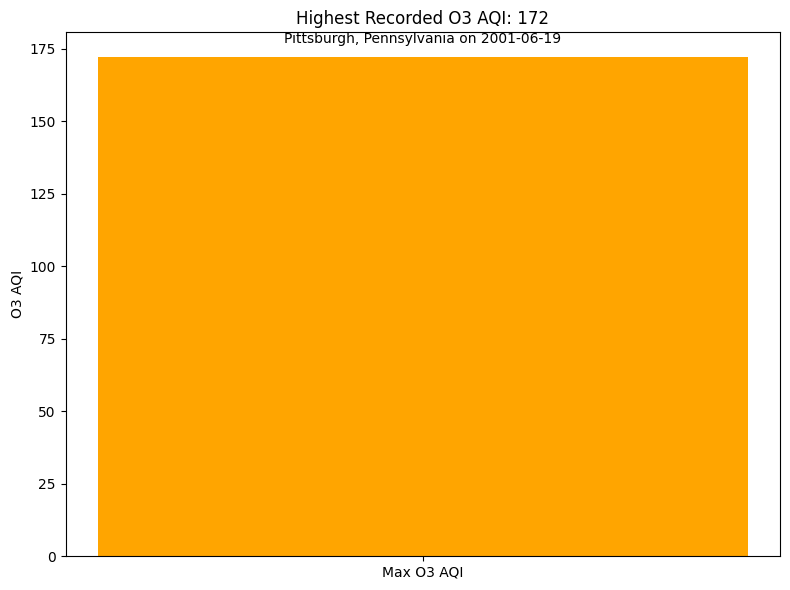

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.bar('Max O3 AQI', max_o3, color='orange')
plt.title(f'Highest Recorded O3 AQI: {max_o3}')
plt.ylabel('O3 AQI')
plt.text(0, max_o3 + 5, label, ha='center')
plt.tight_layout()
plt.show()

This single-bar chart above emphasizes the maximum O3 AQI value recorded, serving as a visual marker for the peak ozone pollution event in the dataset.

#### 11. Correlation Between Pollutant Means

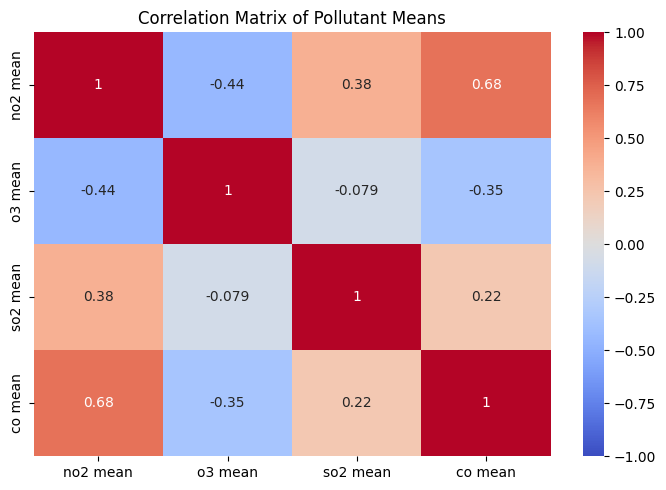

In [ ]:
# Select relevant columns (use lowercase column names)
pollutant_means = df[['no2 mean', 'o3 mean', 'so2 mean', 'co mean']]

# Compute correlation matrix
corr_matrix = pollutant_means.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutant Means')
plt.tight_layout()
plt.show()

The heatmap above visualizes the correlations between average levels of NO2, O3, SO2, and CO, using color gradients to reveal positive and negative relationships among pollutants.

#### 12. Average SO2 AQI by Year

In [ ]:
# Extract year from date
df['year'] = pd.to_datetime(df['date local']).dt.year

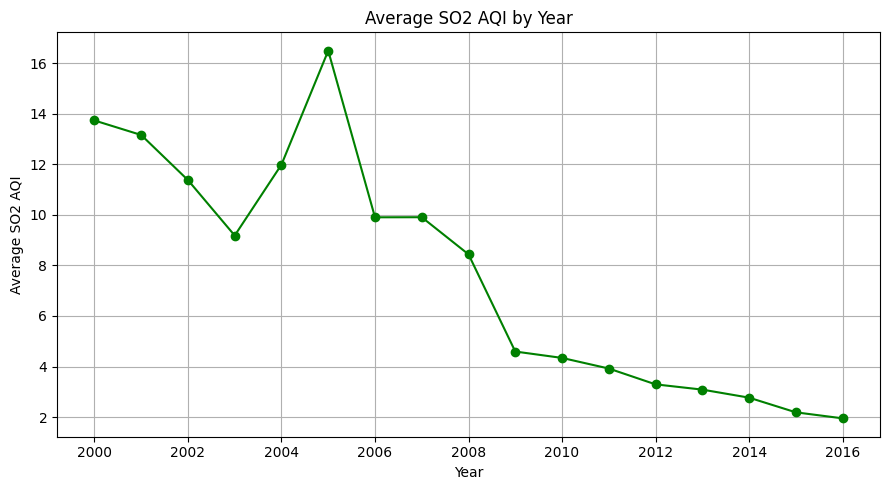

In [ ]:
# Compute average SO2 AQI by year
avg_so2 = df.groupby('year')['so2 aqi'].mean().sort_index()

# Plot
plt.figure(figsize=(9, 5))
avg_so2.plot(kind='line', marker='o', color='green')
plt.title('Average SO2 AQI by Year')
plt.xlabel('Year')
plt.ylabel('Average SO2 AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart above tracks the trend in average SO2 AQI over the years, illustrating fluctuations and potential declines in sulfur dioxide pollution levels.

#### 13. Average AQI by year for NO2, 03, SO2, CO

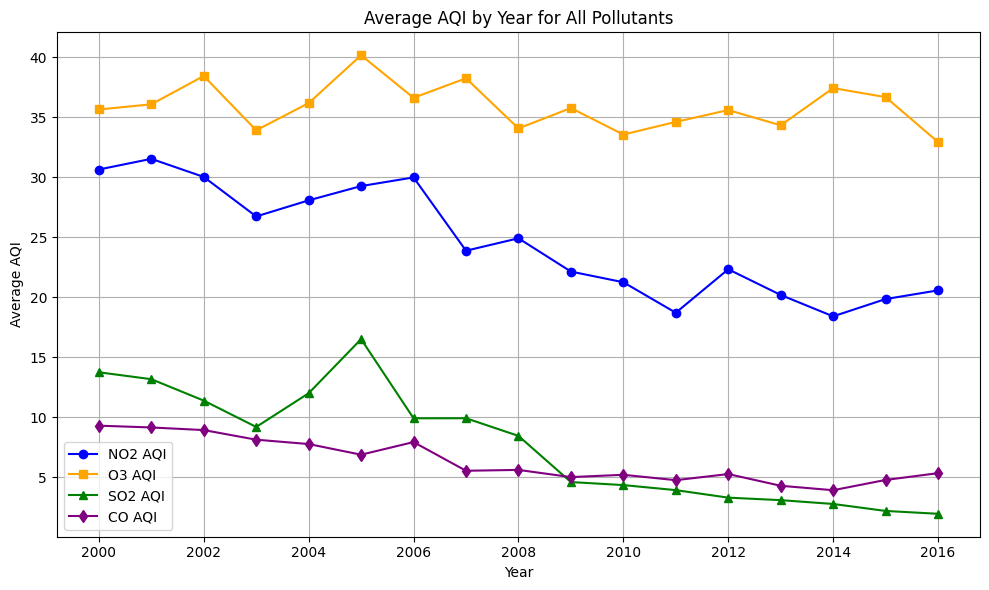

In [ ]:
# Compute average AQI for each pollutant by year

avg_no2 = df.groupby('year')['no2 aqi'].mean().sort_index()
avg_o3 = df.groupby('year')['o3 aqi'].mean().sort_index()
avg_so2 = df.groupby('year')['so2 aqi'].mean().sort_index()
avg_co = df.groupby('year')['co aqi'].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_no2.index, avg_no2, marker='o', color='blue', label='NO2 AQI')
plt.plot(avg_o3.index, avg_o3, marker='s', color='orange', label='O3 AQI')
plt.plot(avg_so2.index, avg_so2, marker='^', color='green', label='SO2 AQI')
plt.plot(avg_co.index, avg_co, marker='d', color='purple', label='CO AQI')
plt.title('Average AQI by Year for All Pollutants')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart above illustrates the annual trends in average AQI levels for NO2, O3, SO2, and CO from 2000 to 2016, using distinct colors and markers for each pollutant to ensure clarity. It highlights temporal patterns, such as declines in SO2 and CO AQI, while NO2 and O3 show more variability, aiding in understanding air quality changes over time.

### Limitations

1. Large number of categories – With many regions and cities, some charts become difficult to read. Filtering to the top values or grouping smaller categories was used to reduce this, but some detail may be lost.

2. Dataset constraints – The results depend entirely on the data provided. If some regions or cities are under-represented, the findings may not give a balanced picture.

3. Descriptive focus – The analysis describes what the data shows but does not explain why differences exist. Any interpretation should be made with caution.

4. Static presentation – While static plots give a useful overview, interactive visuals would allow for deeper exploration (e.g. selecting regions on demand).

5. Scalability – The approach works well for this dataset, but larger datasets may require more efficient tools such as database queries or automated dashboards.

## Conclusion

This analysis provided a clearer picture of the dataset by combining descriptive statistics, static plots, and interactive charts. Key patterns across regions and categories were identified, while interactive visuals allowed for deeper exploration. Although limited to the available data, the findings offer a strong starting point for further investigation and demonstrate how effective visualisation can turn raw data into actionable insights.